# seleção de Atributos
* nem sempre um maior número de atributos é a melhor estratégia para o modelo
* técnica para seleção de atributos: **Random Forest**

In [2]:
library(e1071)
library(randomForest)

In [4]:
df = read.csv('datasets/Credit.csv')
head(df)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,...,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>
1,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
2,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
3,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
4,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
5,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
6,'no checking',36,'existing paid',education,9055,'no known savings',1<=X<4,2,'male single',none,...,'no known property',35,none,'for free',1,'unskilled resident',2,yes,yes,good


# Treino/test

In [21]:
amost = sample(2, 1000, replace=T, prob=c(0.7,0.3))
train = df[amost==1,]
test = df[amost==2,]

# Primeiro Modelo
* todos os atributos

In [22]:
model_1 = svm(class ~., train)
predict_ = predict(model_1, test)
conf = table(test$class, predict_)
tx = (conf[1]+conf[4])/sum(conf)
tx

[1] 0.7374631

# Aplicando um método de seleção de atributos

,MeanDecreaseGini
checking_status,29.2068108
duration,27.0032759
credit_history,17.9849536
purpose,24.6875355
credit_amount,33.8233882
savings_status,14.2730050
employment,18.9756016
installment_commitment,11.3292779
personal_status,10.2646469
other_parties,5.1012667


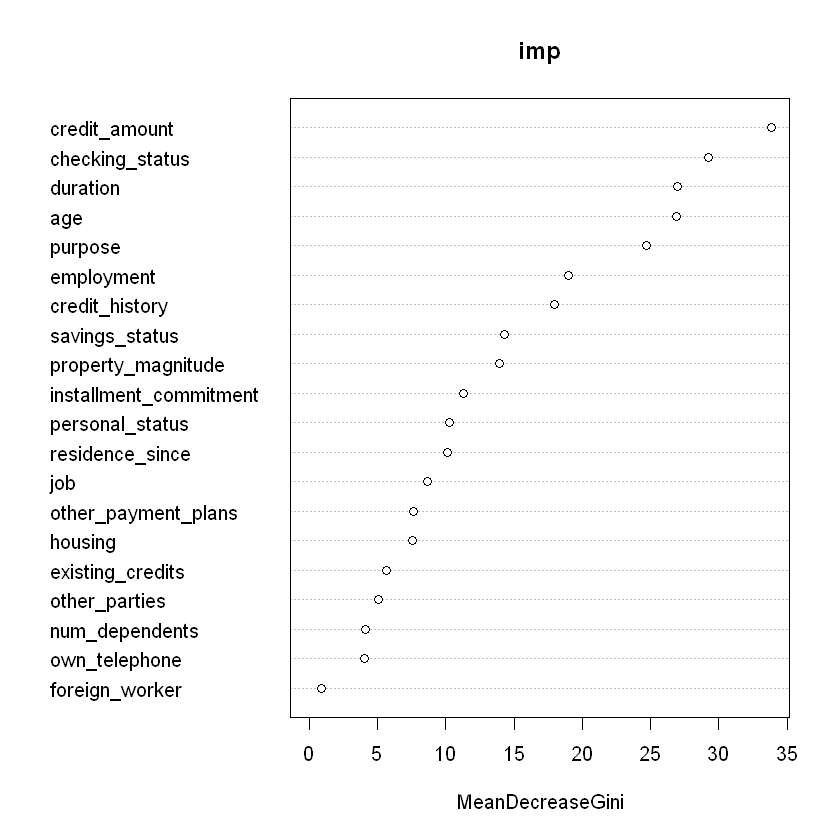

In [23]:
imp = randomForest(class ~., data=train)
col = importance(imp)
col
varImpPlot(imp)

# Segundo Modelo 

In [24]:
model_2 = svm(class~checking_status+duration+credit_history+purpose+credit_amount, train)
predict_ = predict(model_2, test)
conf = table(test$class, predict_)
tx = (conf[1]+conf[4])/sum(conf)
tx

[1] 0.7669617